# Create AI Machine Learning Agent That Makes 30+ ML Models In 30 Seconds

In this notebook, we create an AI machine learning agent that can make 30+ machine learning models in 30 seconds. This AI agent will be able to make models for classification and regression tasks. 

The AI agent uses `h2o` library for AutoML. `h2o` is an open-source machine learning platform that is used for building machine learning models. It is easy to use and provides a lot of flexibility in building machine learning models.

The AI Agent will use the H2O AutoML library to create the models, store the models on your computer, and provide us with a summary of the models, performance metrics, and full breakdown of the AI machine learning workflow.

In [1]:
from langchain_openai import ChatOpenAI
import pandas as pd
import h2o # pip install h2o
import os
from dotenv import load_dotenv

from src.agents.ml_agents import H2OMLAgent

In [2]:
df = pd.read_csv("../data/churn_data copy.csv")
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


### LLM Setup

Run the code to set up your OpenAI API Key and set up key inputs for the LLM model creation and H2O AutoML model creation.

In [3]:
# Load environment variables from .env file
load_dotenv('../.env')

# Define constants for model, logging, and paths
MODEL    = "gpt-4o-mini"
LOG      = True
LOG_PATH = "logs/"
MODEL_PATH = "h2o_models/"

# Initialize the language model
llm = ChatOpenAI(model=MODEL)
llm

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x127f2b820>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x127f5a5c0>, root_client=<openai.OpenAI object at 0x127d078b0>, root_async_client=<openai.AsyncOpenAI object at 0x127f2b8e0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

### Create the Agent

Run the code to create the AI Machine Learning Agent that makes 30+ machine learning models in 30 seconds.

- `model` - The LLM to use.
- `log` and `log_path` - Set to `True` to log the Python function (pipeline) to a file in the `LOG_PATH` directory. (/logs by default)
- `model_directory` - The directory to save the models. (/models by default)
- `enable_mlflow` - Set to `True` to enable MLflow tracking.

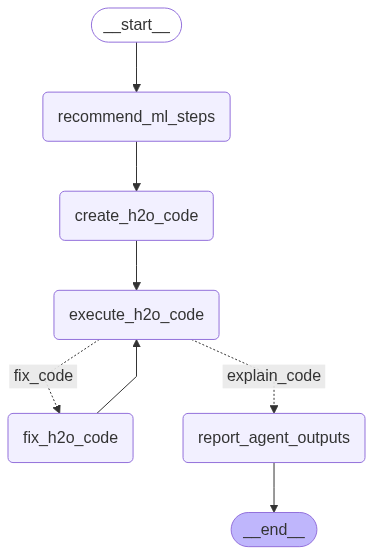

In [4]:
ml_agent = H2OMLAgent(
    model=llm, 
    log=True, 
    log_path=LOG_PATH,
    model_directory=MODEL_PATH, 
    enable_mlflow=False, 
)
ml_agent

### Run the Agent

Run the code to run the AI Machine Learning Agent and create the models.

In [5]:

ml_agent.invoke_agent(
    data_raw=df.drop(columns=["customerID"]),
    user_instructions="Please do classification on 'Churn'. Use a max runtime of 30 seconds.",
    target_variable="Churn"
)

---H2O ML AGENT----
    * RECOMMEND MACHINE LEARNING STEPS
    * CREATE H2O AUTOML CODE
      File saved to: logs/h2o_automl.py
    * EXECUTING AGENT CODE
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "23.0.1" 2024-10-15; OpenJDK Runtime Environment Homebrew (build 23.0.1); OpenJDK 64-Bit Server VM Homebrew (build 23.0.1, mixed mode, sharing)
  Starting server from /Users/abhivir42/projects/ai-ds-venv/lib/python3.10/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/j9/ylb0djv10yq7g8lm599g2dbc0000gp/T/tmpng5abgz_
  JVM stdout: /var/folders/j9/ylb0djv10yq7g8lm599g2dbc0000gp/T/tmpng5abgz_/h2o_abhivir42_started_from_python.out
  JVM stderr: /var/folders/j9/ylb0djv10yq7g8lm599g2dbc0000gp/T/tmpng5abgz_/h2o_abhivir42_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_abhivir42_grv8vn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.984 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
AutoML progress: |
08:12:29.912: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%
    * REPORT AGENT OUTPUTS


/Users/abhivir42/projects/ai-ds-venv/lib/python3.10/site-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


#### Leaderboard

The leaderboard shows the ML models created by the AI Machine Learning Agent ranked by various ML metrics.

In [6]:
# Retrieve and display the leaderboard of models
ml_agent.get_leaderboard()

,model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
0,StackedEnsemble_BestOfFamily_1_AutoML_1_202506...,0.849320,0.411770,0.666501,0.228475,0.365525,0.133609
1,StackedEnsemble_AllModels_1_AutoML_1_20250616_...,0.849165,0.411979,0.665385,0.226278,0.365554,0.133630
2,GBM_grid_1_AutoML_1_20250616_81229_model_6,0.847609,0.418881,0.663995,0.233984,0.368558,0.135835
3,GBM_1_AutoML_1_20250616_81229,0.846983,0.418212,0.659153,0.225387,0.368197,0.135569
4,GBM_grid_1_AutoML_1_20250616_81229_model_7,0.845499,0.419525,0.661327,0.229293,0.368853,0.136053
5,GLM_1_AutoML_1_20250616_81229,0.845134,0.417470,0.652031,0.234092,0.368076,0.135480
6,GBM_grid_1_AutoML_1_20250616_81229_model_1,0.844144,0.419894,0.652145,0.231981,0.368983,0.136148
7,GBM_5_AutoML_1_20250616_81229,0.843480,0.422043,0.657975,0.237834,0.370088,0.136965
8,GBM_grid_1_AutoML_1_20250616_81229_model_12,0.842213,0.422605,0.654694,0.237346,0.370492,0.137264
9,GBM_2_AutoML_1_20250616_81229,0.841018,0.423679,0.658946,0.236984,0.371116,0.137727


#### Get The AI Generated Python Code

The AI Machine Learning Agent will generate Python code that was used to create the models.

In [7]:
# Get the H2O training function in markdown format
ml_agent.get_h2o_train_function(markdown=True)

```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-06-16 08:12:23

def h2o_automl(
    data_raw: pd.DataFrame,
    target: str = 'Churn',
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = True,
    nfolds: int = 5,
    seed: int = 42,
    max_models: int = 20,
    stopping_metric: str = 'AUC',
    stopping_tolerance: float = 0.01,
    stopping_rounds: int = 3,
    model_directory: str = 'h2o_models/',
    log_path: str = 'logs/',
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = 'H2O AutoML',
    mlflow_run_name: str = None,
    **kwargs
):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    
    # Optional MLflow initialization
    if enable_mlflow:
        import mlflow
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name) if mlflow_run_name else mlflow.start_run()
    else:
        from contextlib import nullcontext
        run_context = nullcontext()

    # Initialize H2O
    h2o.init()

    # Convert the DataFrame to H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)

    # Setup AutoML
    aml = H2OAutoML(
        max_runtime_secs=max_runtime_secs,
        exclude_algos=exclude_algos if exclude_algos else ["DeepLearning"],
        balance_classes=balance_classes,
        nfolds=nfolds,
        seed=seed,
        max_models=max_models,
        stopping_metric=stopping_metric,
        stopping_tolerance=stopping_tolerance,
        stopping_rounds=stopping_rounds,
        **kwargs
    )

    with run_context as run:
        # Train the model
        x = [col for col in data_h2o.columns if col != target]
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save the model
        model_path = h2o.save_model(model=aml.leader, path=model_directory, force=True) if model_directory else None

        # Leaderboard
        leaderboard = aml.leaderboard.as_data_frame()

        # Gather top-model metrics from the first row
        top_metrics = leaderboard.iloc[0].to_dict()

        # Construct model_results
        model_results = dict(
            model_flavor="H2O AutoML",
            model_path=model_path,
            best_model_id=aml.leader.model_id,
            metrics=top_metrics
        )

        # Log metrics to MLflow if enabled
        if enable_mlflow:
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)
            mlflow.h2o.log_model(aml.leader, artifact_path="model")
            mlflow.log_params({
                'target': target,
                'max_runtime_secs': max_runtime_secs,
                'exclude_algos': str(exclude_algos),
                'balance_classes': balance_classes,
                'nfolds': nfolds,
                'seed': seed,
                'max_models': max_models,
                'stopping_metric': stopping_metric,
                'stopping_tolerance': stopping_tolerance,
                'stopping_rounds': stopping_rounds,
                'model_directory': model_directory,
                'log_path': log_path
            })

        # Build the output
        output = dict(
            leaderboard=leaderboard.to_dict(orient='records'),
            best_model_id=aml.leader.model_id,
            model_path=model_path,
            model_results=model_results
        )

    return output
```

#### Recommended ML Steps

The AI Machine Learning Agent will provide you with a recommended set of ML steps, which were used to help the Coding Agent create the H2O AutoML models.

In [8]:
# Get the recommended machine learning steps in markdown format
ml_agent.get_recommended_ml_steps(markdown=True)

# Recommended ML Steps:
Here's a recommended step-by-step approach to performing H2O AutoML on the given dataset while maximizing model accuracy:

1. **Import H2O and Initialize Cluster**:
   - Ensure the H2O library is imported and the cluster is initialized.
   ```python
   import h2o
   h2o.init()
   ```

2. **Specify Response and Predictor Variables**:
   - Define the target variable (`Churn`) and the list of predictor variables (all columns except `Churn`).
   - Set `Churn` as a categorical variable since it represents a binary classification problem.

3. **Parameters**:
   - Use `max_models`, setting it to a value like `20`, to ensure a sufficient variety of models is attempted. This is a good balance between runtime and model diversity.
   - Set `max_runtime_secs` to `30` seconds as specified.

4. **Use `balance_classes`**:
   - Enable class balancing (`balance_classes=True`) to help improve performance, especially if there is potential class imbalance in the `Churn` variable.

5. **Stopping Criteria**:
   - Set `stopping_metric='AUC'` for binary classification to measure performance based on the area under the curve, which is appropriate for evaluating classification models.
   - Use `stopping_tolerance=0.01` to allow for a slight margin of improvement before stopping.

6. **Early Stopping Parameters**:
   - Set `stopping_rounds=3` to allow for additional rounds of training before the model is halted even if no performance improvement is seen.

7. **Exclude Deep Learning Algorithms**:
   - Specify `exclude_algos=["DeepLearning"]` in the AutoML run to avoid the lower performance that these models may typically exhibit in this context.

8. **Model Leaderboard**:
   - Ensure to review the leaderboard after the AutoML run using `aml.leaderboard` to assess model performance and evaluate the best-performing models.

9. **AutoML Run Command**:
   - Set up the AutoML run command while ensuring all specified parameters are included. This would look something like:
   ```python
   aml = H2OAutoML(max_runtime_secs=30, max_models=20, balance_classes=True, stopping_metric='AUC', stopping_tolerance=0.01, stopping_rounds=3, exclude_algos=["DeepLearning"])
   aml.train(x=predictors, y='Churn', training_frame=train)
   ```

10. **Post-Modeling Evaluation**:
    - After the AutoML run, evaluate model predictions with `aml.predict(test_data)` using the best model from the leaderboard to understand its performance on unseen data.

By following these steps and recommendations, you can effectively run H2O AutoML on the dataset with the goal of maximizing model accuracy while adhering to user instructions.

#### Get A Complete Workflow Summary

The AI Machine Learning Agent will provide you with a complete workflow summary that includes the Best ML model created, the recommended ML steps, and the Python code used to create the models.

In [9]:
# Get a summary of the workflow in markdown format
ml_agent.get_workflow_summary(markdown=True)

# H2O Machine Learning Agent Outputs

## ---RECOMMENDED STEPS----
# Recommended ML Steps:
Here's a recommended step-by-step approach to performing H2O AutoML on the given dataset while maximizing model accuracy:

1. **Import H2O and Initialize Cluster**:
   - Ensure the H2O library is imported and the cluster is initialized.
   ```python
   import h2o
   h2o.init()
   ```

2. **Specify Response and Predictor Variables**:
   - Define the target variable (`Churn`) and the list of predictor variables (all columns except `Churn`).
   - Set `Churn` as a categorical variable since it represents a binary classification problem.

3. **Parameters**:
   - Use `max_models`, setting it to a value like `20`, to ensure a sufficient variety of models is attempted. This is a good balance between runtime and model diversity.
   - Set `max_runtime_secs` to `30` seconds as specified.

4. **Use `balance_classes`**:
   - Enable class balancing (`balance_classes=True`) to help improve performance, especially if there is potential class imbalance in the `Churn` variable.

5. **Stopping Criteria**:
   - Set `stopping_metric='AUC'` for binary classification to measure performance based on the area under the curve, which is appropriate for evaluating classification models.
   - Use `stopping_tolerance=0.01` to allow for a slight margin of improvement before stopping.

6. **Early Stopping Parameters**:
   - Set `stopping_rounds=3` to allow for additional rounds of training before the model is halted even if no performance improvement is seen.

7. **Exclude Deep Learning Algorithms**:
   - Specify `exclude_algos=["DeepLearning"]` in the AutoML run to avoid the lower performance that these models may typically exhibit in this context.

8. **Model Leaderboard**:
   - Ensure to review the leaderboard after the AutoML run using `aml.leaderboard` to assess model performance and evaluate the best-performing models.

9. **AutoML Run Command**:
   - Set up the AutoML run command while ensuring all specified parameters are included. This would look something like:
   ```python
   aml = H2OAutoML(max_runtime_secs=30, max_models=20, balance_classes=True, stopping_metric='AUC', stopping_tolerance=0.01, stopping_rounds=3, exclude_algos=["DeepLearning"])
   aml.train(x=predictors, y='Churn', training_frame=train)
   ```

10. **Post-Modeling Evaluation**:
    - After the AutoML run, evaluate model predictions with `aml.predict(test_data)` using the best model from the leaderboard to understand its performance on unseen data.

By following these steps and recommendations, you can effectively run H2O AutoML on the dataset with the goal of maximizing model accuracy while adhering to user instructions.

## ---H2O TRAIN FUNCTION----
```python
# Disclaimer: This function was generated by AI. Please review before using.
# Agent Name: h2o_ml_agent
# Time Created: 2025-06-16 08:12:23

def h2o_automl(
    data_raw: pd.DataFrame,
    target: str = 'Churn',
    max_runtime_secs: int = 30,
    exclude_algos: list = None,
    balance_classes: bool = True,
    nfolds: int = 5,
    seed: int = 42,
    max_models: int = 20,
    stopping_metric: str = 'AUC',
    stopping_tolerance: float = 0.01,
    stopping_rounds: int = 3,
    model_directory: str = 'h2o_models/',
    log_path: str = 'logs/',
    enable_mlflow: bool = False,
    mlflow_tracking_uri: str = None,
    mlflow_experiment_name: str = 'H2O AutoML',
    mlflow_run_name: str = None,
    **kwargs
):
    import h2o
    from h2o.automl import H2OAutoML
    import pandas as pd
    
    # Optional MLflow initialization
    if enable_mlflow:
        import mlflow
        if mlflow_tracking_uri:
            mlflow.set_tracking_uri(mlflow_tracking_uri)
        mlflow.set_experiment(mlflow_experiment_name)
        run_context = mlflow.start_run(run_name=mlflow_run_name) if mlflow_run_name else mlflow.start_run()
    else:
        from contextlib import nullcontext
        run_context = nullcontext()

    # Initialize H2O
    h2o.init()

    # Convert the DataFrame to H2OFrame
    data_h2o = h2o.H2OFrame(data_raw)

    # Setup AutoML
    aml = H2OAutoML(
        max_runtime_secs=max_runtime_secs,
        exclude_algos=exclude_algos if exclude_algos else ["DeepLearning"],
        balance_classes=balance_classes,
        nfolds=nfolds,
        seed=seed,
        max_models=max_models,
        stopping_metric=stopping_metric,
        stopping_tolerance=stopping_tolerance,
        stopping_rounds=stopping_rounds,
        **kwargs
    )

    with run_context as run:
        # Train the model
        x = [col for col in data_h2o.columns if col != target]
        aml.train(x=x, y=target, training_frame=data_h2o)

        # Save the model
        model_path = h2o.save_model(model=aml.leader, path=model_directory, force=True) if model_directory else None

        # Leaderboard
        leaderboard = aml.leaderboard.as_data_frame()

        # Gather top-model metrics from the first row
        top_metrics = leaderboard.iloc[0].to_dict()

        # Construct model_results
        model_results = dict(
            model_flavor="H2O AutoML",
            model_path=model_path,
            best_model_id=aml.leader.model_id,
            metrics=top_metrics
        )

        # Log metrics to MLflow if enabled
        if enable_mlflow:
            numeric_metrics = {k: v for k, v in top_metrics.items() if isinstance(v, (int, float))}
            mlflow.log_metrics(numeric_metrics)
            mlflow.h2o.log_model(aml.leader, artifact_path="model")
            mlflow.log_params({
                'target': target,
                'max_runtime_secs': max_runtime_secs,
                'exclude_algos': str(exclude_algos),
                'balance_classes': balance_classes,
                'nfolds': nfolds,
                'seed': seed,
                'max_models': max_models,
                'stopping_metric': stopping_metric,
                'stopping_tolerance': stopping_tolerance,
                'stopping_rounds': stopping_rounds,
                'model_directory': model_directory,
                'log_path': log_path
            })

        # Build the output
        output = dict(
            leaderboard=leaderboard.to_dict(orient='records'),
            best_model_id=aml.leader.model_id,
            model_path=model_path,
            model_results=model_results
        )

    return output
```

## ---H2O TRAIN FUNCTION PATH----
```python
logs/h2o_automl.py
```

## ---H2O TRAIN FUNCTION NAME----
```python
h2o_automl
```

## ---H2O TRAIN ERROR----
None

## ---MODEL PATH----
/Users/abhivir42/projects/fetch/ai-data-science/demo/h2o_models/StackedEnsemble_BestOfFamily_1_AutoML_1_20250616_81229

## ---BEST MODEL ID----
StackedEnsemble_BestOfFamily_1_AutoML_1_20250616_81229

#### Get The Logging Summary 

The AI Machine Learning Agent will provide you with a logging summary that includes the ML models created and Python code location.

In [10]:
# Get a summary of the logs in markdown format
ml_agent.get_log_summary(markdown=True)


## H2O Machine Learning Agent Log Summary:

Function Path: logs/h2o_automl.py

Function Name: h2o_automl

Best Model ID: StackedEnsemble_BestOfFamily_1_AutoML_1_20250616_81229

Model Path: /Users/abhivir42/projects/fetch/ai-data-science/demo/h2o_models/StackedEnsemble_BestOfFamily_1_AutoML_1_20250616_81229
                

#### Get the Best Model ID

In [11]:
ml_agent.get_best_model_id()

'StackedEnsemble_BestOfFamily_1_AutoML_1_20250616_81229'

### Load The Model

Run the code to load the model and view the model summary, get performance metrics, make predictions, and explain the model.

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321. connected.


H2O_cluster_uptime:,4 mins 10 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,2 months and 19 days
H2O_cluster_name:,H2O_from_python_abhivir42_grv8vn
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.903 Gb
H2O_cluster_total_cores:,10
H2O_cluster_allowed_cores:,10
H2O_cluster_status:,"locked, healthy"


#### Load The Model and Display Performance

In [13]:
# Load the model
model = h2o.get_model(ml_agent.get_best_model_id())

model

key,value
Stacking strategy,cross_validation
Number of base models (used / total),4/4
# GBM base models (used / total),1/1
# GLM base models (used / total),1/1
# DRF base models (used / total),2/2
Metalearner algorithm,GLM
Metalearner fold assignment scheme,Random
Metalearner nfolds,5
Metalearner fold_column,None
Custom metalearner hyperparameters,None


#### Make Predictions

Run the code to make predictions using the model.

In [14]:
# Make predictions using the loaded model
model.predict(h2o.H2OFrame(df))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


predict,No,Yes
Yes,0.374091,0.625909
No,0.961759,0.0382409
Yes,0.547345,0.452655
No,0.968665,0.0313349
Yes,0.339387,0.660613
Yes,0.178393,0.821607
Yes,0.609365,0.390635
No,0.748258,0.251742
Yes,0.405181,0.594819
No,0.978847,0.0211529
